In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('infrastructure.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     266 non-null    object 
 1   Access_to_Electricity       263 non-null    float64
 2   Access_to_Safe_Water        179 non-null    float64
 3   Internet_Usage              242 non-null    float64
 4   Fixed_Broadband_Subs        256 non-null    float64
 5   Air_Transport_Passengers    220 non-null    float64
 6   Electric_Power_Consumption  194 non-null    float64
 7   Renewable_Energy_Share      260 non-null    float64
 8   Category                    266 non-null    object 
dtypes: float64(7), object(2)
memory usage: 18.8+ KB


In [4]:
df = df[df['Access_to_Electricity'] > 0]
df = df[df['Access_to_Safe_Water'] > 0]
df = df[df['Internet_Usage'] > 0]
df = df[df['Fixed_Broadband_Subs'] > 0]
df = df[df['Air_Transport_Passengers'] > 0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 265
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     154 non-null    object 
 1   Access_to_Electricity       154 non-null    float64
 2   Access_to_Safe_Water        154 non-null    float64
 3   Internet_Usage              154 non-null    float64
 4   Fixed_Broadband_Subs        154 non-null    float64
 5   Air_Transport_Passengers    154 non-null    float64
 6   Electric_Power_Consumption  138 non-null    float64
 7   Renewable_Energy_Share      153 non-null    float64
 8   Category                    154 non-null    object 
dtypes: float64(7), object(2)
memory usage: 12.0+ KB


In [5]:
X = df.drop(columns=['country','Category', 'Access_to_Safe_Water', 'Electric_Power_Consumption'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 265
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Access_to_Electricity     154 non-null    float64
 1   Internet_Usage            154 non-null    float64
 2   Fixed_Broadband_Subs      154 non-null    float64
 3   Air_Transport_Passengers  154 non-null    float64
 4   Renewable_Energy_Share    153 non-null    float64
dtypes: float64(5)
memory usage: 7.2 KB


In [6]:
X = X.dropna()
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 0 to 265
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Access_to_Electricity     153 non-null    float64
 1   Internet_Usage            153 non-null    float64
 2   Fixed_Broadband_Subs      153 non-null    float64
 3   Air_Transport_Passengers  153 non-null    float64
 4   Renewable_Energy_Share    153 non-null    float64
dtypes: float64(5)
memory usage: 7.2 KB


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [9]:
df.loc[X.index, 'Cluster_ID'] = clusters

In [10]:
means = df.groupby('Cluster_ID')[X.columns].mean()

In [11]:
nazwy_klastrow = {
    0: 'Developed',
    2: 'Developing',
    1: 'Struggling',
    3: 'Economy Hub'
}

df['Cluster_Name'] = df['Cluster_ID'].map(nazwy_klastrow)
df.to_csv('infrastructure_clustered_final.csv', index=False)

In [15]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 1 to 265
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     138 non-null    object 
 1   Access_to_Electricity       138 non-null    float64
 2   Access_to_Safe_Water        138 non-null    float64
 3   Internet_Usage              138 non-null    float64
 4   Fixed_Broadband_Subs        138 non-null    float64
 5   Air_Transport_Passengers    138 non-null    float64
 6   Electric_Power_Consumption  138 non-null    float64
 7   Renewable_Energy_Share      138 non-null    float64
 8   Category                    138 non-null    object 
 9   Cluster_ID                  138 non-null    float64
 10  Cluster_Name                138 non-null    object 
dtypes: float64(8), object(3)
memory usage: 12.9+ KB


C:\Users\Dawid\AppData\Local\Temp\ipykernel_5612\2576648108.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Wpływ (%)', y='Cecha', data=importance_df, palette='viridis')


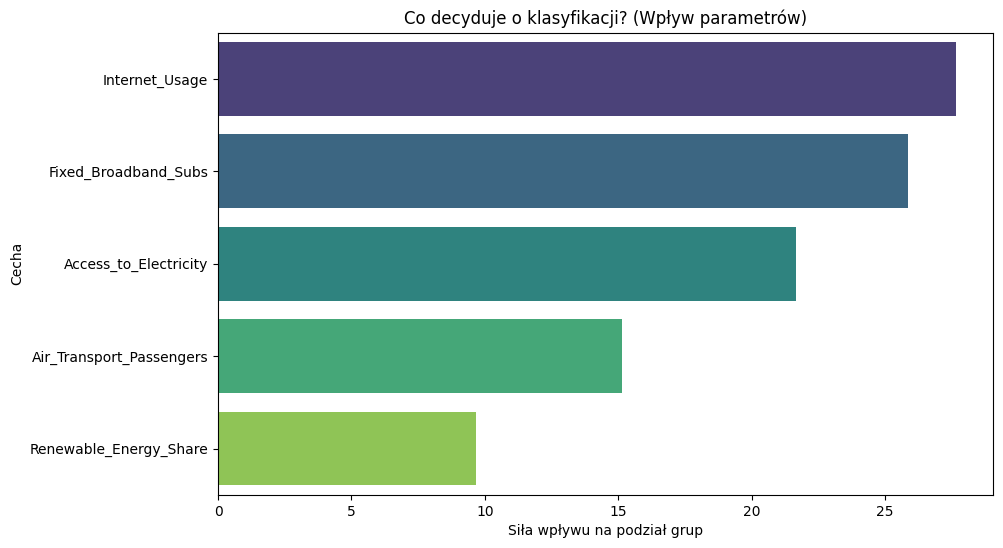

Najważniejsze 3 cechy to:
                   Cecha  Wpływ (%)
1         Internet_Usage  27.670325
2   Fixed_Broadband_Subs  25.861237
0  Access_to_Electricity  21.661092


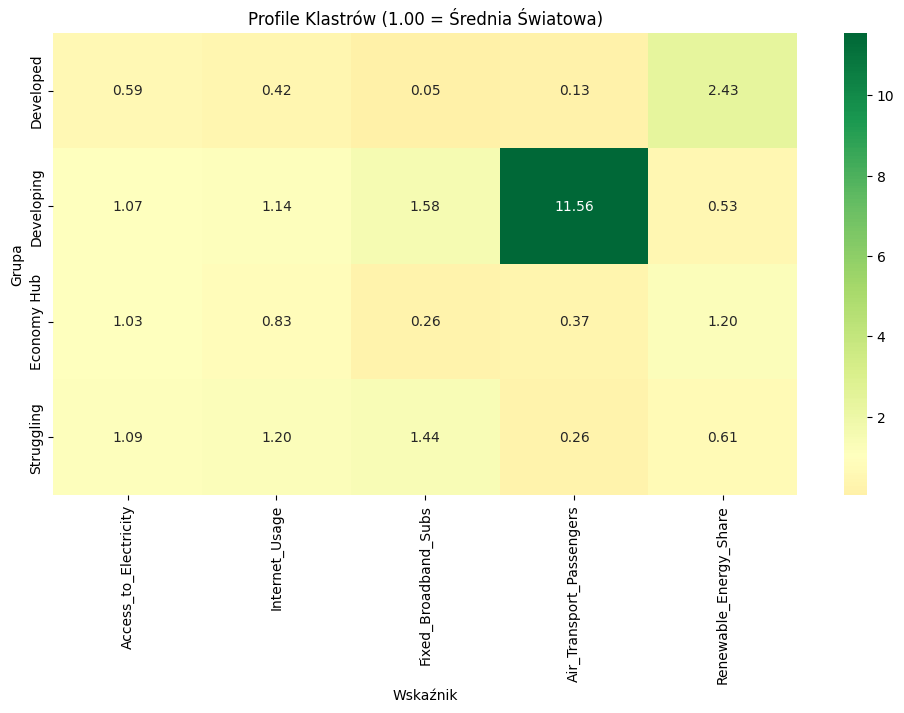

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

features = [
 'Access_to_Electricity', 'Internet_Usage', 'Fixed_Broadband_Subs', 'Air_Transport_Passengers', 'Renewable_Energy_Share'
]
# --- KONFIGURACJA ---
# Upewnij się, że masz te zmienne z poprzednich kroków:
# df - Twoja główna tabela
# features - lista kolumn użytych do klastrowania
# 'Cluster_Name' - kolumna z nazwami grup

# 1. KTÓRE PARAMETRY SĄ NAJWAŻNIEJSZE? (Feature Importance)
# Trenujemy szybki model klasyfikacji, żeby "zrozumiał", jak powstały klastry
X = df[features].fillna(0)
y = df['Cluster_ID'] # Używamy ID, bo jest cyfrą

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Tworzymy tabelę ważności
importance_df = pd.DataFrame({
    'Cecha': features,
    'Wpływ (%)': rf.feature_importances_ * 100
}).sort_values(by='Wpływ (%)', ascending=False)

# Rysujemy wykres
plt.figure(figsize=(10, 6))
sns.barplot(x='Wpływ (%)', y='Cecha', data=importance_df, palette='viridis')
plt.title('Co decyduje o klasyfikacji? (Wpływ parametrów)')
plt.xlabel('Siła wpływu na podział grup')
plt.show()

print("Najważniejsze 3 cechy to:")
print(importance_df.head(3))


# 2. PROFILOWANIE KLASTRÓW (Heatmapa - Jak bardzo różnią się od średniej?)
# Obliczamy średnie dla każdej grupy
cluster_means = df.groupby('Cluster_Name')[features].mean()

# Obliczamy średnią globalną (dla całego świata)
global_means = df[features].mean()

# Obliczamy różnicę w procentach (np. 1.5 oznacza 150% średniej światowej)
# To pozwala porównać ze sobą różne jednostki (dolary, procenty, lata)
relative_profile = cluster_means / global_means

# Rysujemy Heatmapę
plt.figure(figsize=(12, 6))
sns.heatmap(relative_profile, annot=True, fmt=".2f", cmap="RdYlGn", center=1)
plt.title('Profile Klastrów (1.00 = Średnia Światowa)')
plt.ylabel('Grupa')
plt.xlabel('Wskaźnik')
plt.show()